# Hierarchical Clustering of Cancer Types Based on Inmunohistochemisty Staining Levels
Staining profiles for proteins in human tumor tissue based on immunohistochemisty using tissue micro arrays and log-rank P value for Kaplan-Meier analysis of correlation between mRNA expression level and patient survival. 
The tab-separated file includes Ensembl gene identifier ("Gene"), gene name ("Gene name"), tumor name ("Cancer"), the number of patients annotated for different staining levels ("High", "Medium", "Low" & "Not detected") and log-rank p values for patient survival and mRNA correlation ("prognostic - favorable", "unprognostic - favorable", "prognostic - unfavorable", "unprognostic - unfavorable"). 

The data is based on The Human Protein Atlas version 22.0 and Ensembl version 103.38.



## Introduction

The aim of this project is to perform a hierarchical clustering analysis on different types of cancer based on protein staining. Protein staining provides valuable insights into the presence and expression of specific proteins, which can be indicative of cancer development and progression. By clustering the cancer types according to the staining patterns, we can identify potential similarities or differences in gene expression profiles among the various cancer types.

To achieve this, we will utilize a hierarchical clustering approach.

In [1]:
#Libraries

import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Reading the df
df = pd.read_csv('pathology.tsv', sep='\t')
df

,Gene,Gene name,Cancer,High,Medium,Low,Not detected,prognostic - favorable,unprognostic - favorable,prognostic - unfavorable,unprognostic - unfavorable
0,ENSG00000000003,TSPAN6,breast cancer,1.0,7.0,2.0,2.0,NaN,0.07712,NaN,NaN
1,ENSG00000000003,TSPAN6,carcinoid,0.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN
2,ENSG00000000003,TSPAN6,cervical cancer,11.0,1.0,0.0,0.0,NaN,0.08967,NaN,NaN
3,ENSG00000000003,TSPAN6,colorectal cancer,0.0,6.0,2.0,2.0,NaN,0.03562,NaN,NaN
4,ENSG00000000003,TSPAN6,endometrial cancer,10.0,2.0,0.0,0.0,NaN,NaN,NaN,0.2567
...,...,...,...,...,...,...,...,...,...,...,...
401795,ENSG00000288695,AC064824.1,skin cancer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401796,ENSG00000288695,AC064824.1,stomach cancer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401797,ENSG00000288695,AC064824.1,testis cancer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401798,ENSG00000288695,AC064824.1,thyroid cancer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Gene', 'Gene name', 'Cancer', 'High', 'Medium', 'Low', 'Not detected',
       'prognostic - favorable', 'unprognostic - favorable',
       'prognostic - unfavorable', 'unprognostic - unfavorable'],
      dtype='object')

For this analysis it won´t be used the log-rank p values for patient survival and mRNA correlation.

In [4]:
#Filtrated dataframe

df_staining = df.iloc[:,:7]
df_staining

,Gene,Gene name,Cancer,High,Medium,Low,Not detected
0,ENSG00000000003,TSPAN6,breast cancer,1.0,7.0,2.0,2.0
1,ENSG00000000003,TSPAN6,carcinoid,0.0,1.0,1.0,2.0
2,ENSG00000000003,TSPAN6,cervical cancer,11.0,1.0,0.0,0.0
3,ENSG00000000003,TSPAN6,colorectal cancer,0.0,6.0,2.0,2.0
4,ENSG00000000003,TSPAN6,endometrial cancer,10.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...
401795,ENSG00000288695,AC064824.1,skin cancer,NaN,NaN,NaN,NaN
401796,ENSG00000288695,AC064824.1,stomach cancer,NaN,NaN,NaN,NaN
401797,ENSG00000288695,AC064824.1,testis cancer,NaN,NaN,NaN,NaN
401798,ENSG00000288695,AC064824.1,thyroid cancer,NaN,NaN,NaN,NaN


In [5]:
#Columns types 

df_staining.dtypes

Gene             object
Gene name        object
Cancer           object
High            float64
Medium          float64
Low             float64
Not detected    float64
dtype: object

In [6]:
#Uniques values:

df_staining.nunique()

Gene            20090
Gene name       20082
Cancer             20
High               13
Medium             13
Low                13
Not detected       13
dtype: int64

In [7]:
#Filter the dataset with the rows that have the stain level

df_1 = df_staining.dropna(subset=['High',"Medium","Low","Not detected"])

#To identify the gene it will be used "Gene" column that corresponds to the gene identifier number.
df_1 = df_1.drop("Gene name", axis=1)

df_1

,Gene,Cancer,High,Medium,Low,Not detected
0,ENSG00000000003,breast cancer,1.0,7.0,2.0,2.0
1,ENSG00000000003,carcinoid,0.0,1.0,1.0,2.0
2,ENSG00000000003,cervical cancer,11.0,1.0,0.0,0.0
3,ENSG00000000003,colorectal cancer,0.0,6.0,2.0,2.0
4,ENSG00000000003,endometrial cancer,10.0,2.0,0.0,0.0
...,...,...,...,...,...,...
401775,ENSG00000288684,skin cancer,0.0,7.0,0.0,4.0
401776,ENSG00000288684,stomach cancer,4.0,8.0,0.0,0.0
401777,ENSG00000288684,testis cancer,0.0,7.0,2.0,0.0
401778,ENSG00000288684,thyroid cancer,3.0,1.0,0.0,0.0


The filtered dataset consists of 306357 rows and 6 columns.

## Proportion of positive individuals for each gene

In order to simplify the dataset and capture the overall proportion of positive individuals for each gene, we will create a new variable. This new variable will be calculated by summing up the values from the "High," "Medium," "Low," and "Not detected" columns. By doing so, we obtain the total proportion of individuals who tested positive for the protein, regardless of the staining intensity.

In [8]:
#Calculating the number of patients evaluated per each combination of Gen and Cancer 

def sample_s(H, M, L, NT):
    x= H+M+L+NT
    return(x)

df_1['SampleSize'] = sample_s(df_1['High'], df_1['Medium'], df_1['Low'], df_1['Not detected'])

In [9]:
df_1.head()

,Gene,Cancer,High,Medium,Low,Not detected,SampleSize
0,ENSG00000000003,breast cancer,1.0,7.0,2.0,2.0,12.0
1,ENSG00000000003,carcinoid,0.0,1.0,1.0,2.0,4.0
2,ENSG00000000003,cervical cancer,11.0,1.0,0.0,0.0,12.0
3,ENSG00000000003,colorectal cancer,0.0,6.0,2.0,2.0,10.0
4,ENSG00000000003,endometrial cancer,10.0,2.0,0.0,0.0,12.0


In [10]:
#Index reset
df_1 = df_1.reset_index(drop=True)

### Transform data in proportions


In [11]:
cols = ["High", "Medium", "Low", "Not detected"]
df_1[cols] = df_1[cols].div(df_1[cols].sum(axis=1), axis=0)

df_1["PositiveProportion"] = df_1[["High","Medium","Low"]].sum(axis=1)

df_1

,Gene,Cancer,High,Medium,Low,Not detected,SampleSize,PositiveProportion
0,ENSG00000000003,breast cancer,0.083333,0.583333,0.166667,0.166667,12.0,0.833333
1,ENSG00000000003,carcinoid,0.000000,0.250000,0.250000,0.500000,4.0,0.500000
2,ENSG00000000003,cervical cancer,0.916667,0.083333,0.000000,0.000000,12.0,1.000000
3,ENSG00000000003,colorectal cancer,0.000000,0.600000,0.200000,0.200000,10.0,0.800000
4,ENSG00000000003,endometrial cancer,0.833333,0.166667,0.000000,0.000000,12.0,1.000000
...,...,...,...,...,...,...,...,...
306352,ENSG00000288684,skin cancer,0.000000,0.636364,0.000000,0.363636,11.0,0.636364
306353,ENSG00000288684,stomach cancer,0.333333,0.666667,0.000000,0.000000,12.0,1.000000
306354,ENSG00000288684,testis cancer,0.000000,0.777778,0.222222,0.000000,9.0,1.000000
306355,ENSG00000288684,thyroid cancer,0.750000,0.250000,0.000000,0.000000,4.0,1.000000


In [12]:
df_1.nunique()

Gene                  15318
Cancer                   20
High                     47
Medium                   47
Low                      47
Not detected             47
SampleSize               12
PositiveProportion       74
dtype: int64

## Preparing the dataframe for the clustering

In [22]:
newdf = df_1.pivot_table(index='Cancer', columns="Gene", values="PositiveProportion")
newdf = newdf.reset_index()


In [23]:
newdf = pd.DataFrame(newdf)
newdf

Gene,Cancer,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000287080,ENSG00000287542,ENSG00000288520,ENSG00000288558,ENSG00000288602,ENSG00000288607,ENSG00000288616,ENSG00000288631,ENSG00000288637,ENSG00000288684
0,breast cancer,0.833333,0.750000,1.000000,0.333333,0.833333,1.000000,0.000000,0.166667,1.000000,...,1.0,0.833333,0.000000,1.000000,0.111111,0.166667,0.166667,0.166667,0.000000,1.000000
1,carcinoid,0.500000,0.333333,1.000000,0.750000,0.750000,1.000000,0.000000,0.000000,1.000000,...,1.0,0.333333,0.000000,0.500000,1.000000,0.333333,0.333333,0.333333,0.000000,1.000000
2,cervical cancer,1.000000,0.416667,0.818182,0.454545,1.000000,1.000000,0.000000,0.166667,0.916667,...,1.0,0.583333,0.000000,0.416667,0.416667,0.181818,0.181818,0.181818,0.000000,0.750000
3,colorectal cancer,0.800000,1.000000,1.000000,0.300000,0.250000,1.000000,0.083333,0.166667,1.000000,...,1.0,0.727273,0.000000,0.666667,0.636364,0.727273,0.727273,0.727273,0.833333,1.000000
4,endometrial cancer,1.000000,0.909091,1.000000,0.363636,0.363636,0.909091,0.000000,0.000000,1.000000,...,1.0,0.833333,0.083333,0.916667,0.333333,0.200000,0.200000,0.200000,0.454545,1.000000
5,glioma,0.000000,0.363636,1.000000,0.272727,1.000000,0.111111,0.000000,0.000000,1.000000,...,1.0,0.636364,0.000000,1.000000,0.363636,0.000000,0.000000,0.000000,0.600000,0.888889
6,head and neck cancer,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.750000,...,1.0,1.000000,0.000000,1.000000,1.000000,0.750000,0.750000,0.750000,0.000000,1.000000
7,liver cancer,1.000000,0.916667,1.000000,0.363636,0.888889,1.000000,0.083333,0.454545,1.000000,...,1.0,0.916667,0.000000,0.750000,1.000000,0.500000,0.500000,0.500000,0.083333,1.000000
8,lung cancer,1.000000,0.454545,0.833333,0.111111,0.600000,0.727273,0.000000,0.272727,0.818182,...,1.0,0.111111,0.083333,0.333333,0.500000,0.500000,0.500000,0.500000,0.000000,0.916667
9,lymphoma,0.000000,0.916667,1.000000,0.000000,0.166667,0.750000,0.000000,0.000000,0.727273,...,1.0,0.083333,0.166667,0.090909,0.090909,0.166667,0.166667,0.166667,0.000000,0.916667


In [35]:
#Are there any Null in newdf

if newdf.isnull().any().any():
    print("The df has Nullvalues")
else:
    print("The df has not Nullvalues")

The df has not Nullvalues


In [36]:
newdf = newdf.dropna(axis=1)
newdf.shape

(20, 15316)

# Hierarchical clustering

Hierarchical clustering will then be applied to the transformed dataset. This clustering technique enables us to identify groups of cancer types that exhibit similar protein staining patterns. The resulting clusters will provide insights into potential relationships between cancer types based on gene expression profiles, facilitating further analysis and interpretation of the underlying biological mechanisms.


In [28]:
#Obtain a list containing the names of the gene columns.
columns= newdf.columns.tolist()
columns_genes = columns[1:]

In [29]:
#Create an array with PositiveProportion values

prop_values = newdf[columns_genes].iloc[:,:].values
prop_values

array([[0.83333333, 0.75      , 1.        , ..., 0.16666667, 0.        ,
        1.        ],
       [0.5       , 0.33333333, 1.        , ..., 0.33333333, 0.        ,
        1.        ],
       [1.        , 0.41666667, 0.81818182, ..., 0.18181818, 0.        ,
        0.75      ],
       ...,
       [0.16666667, 1.        , 1.        , ..., 0.08333333, 0.        ,
        1.        ],
       [0.5       , 1.        , 1.        , ..., 0.5       , 0.33333333,
        1.        ],
       [1.        , 0.81818182, 1.        , ..., 0.63636364, 0.        ,
        1.        ]])

In [38]:
#Create a list with cancer names
cancer_names = newdf["Cancer"].tolist()

In [30]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage



In [31]:
cluster = linkage(prop_values, method="average", optimal_ordering=True)


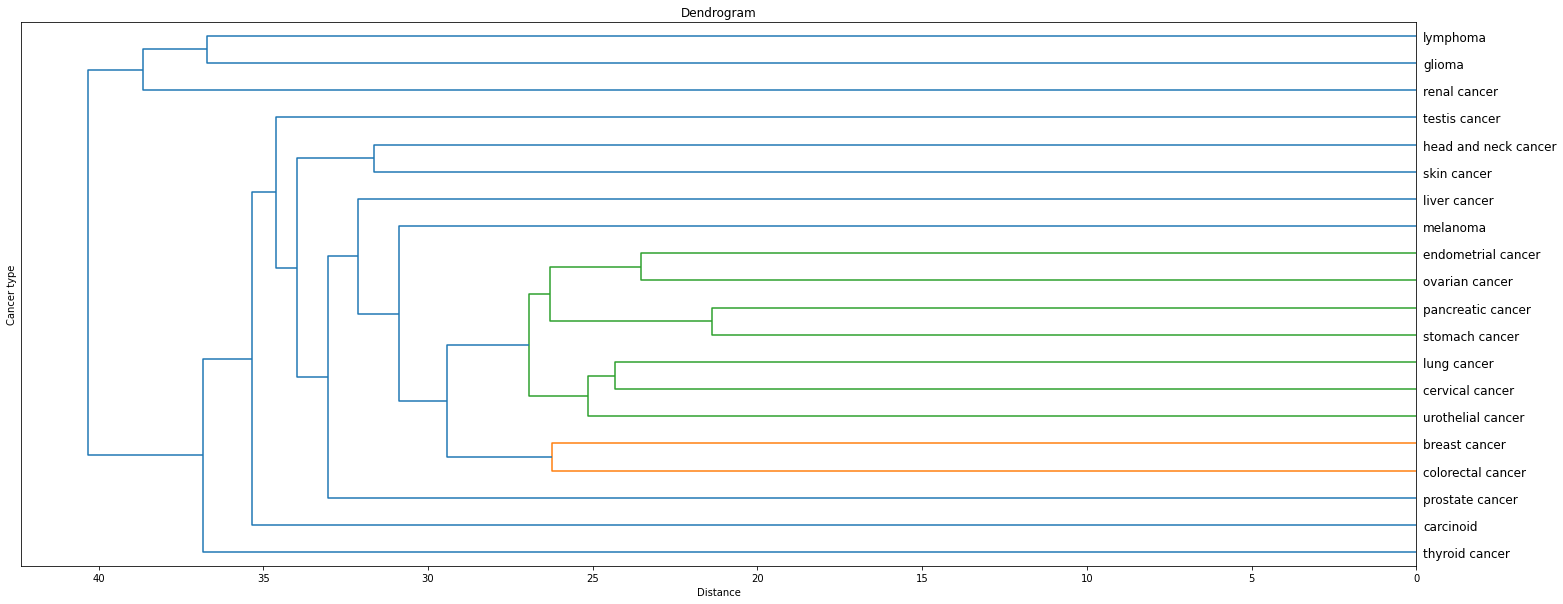

In [39]:

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(cluster, orientation= "left", labels=cancer_names)
plt.xlabel("Distance")
plt.ylabel("Cancer type")
plt.title('Dendrogram')
plt.show()



# Conclution:

This project has demonstrated the potential of hierarchical clustering analysis on different types of cancer based on protein staining patterns. Despite the presence of null values in the dataset, the evaluation of 15,318 genes has provided valuable insights into the molecular landscape of cancer. By creating a new variable that represents the total proportion of positive individuals for each gene, we have captured the overall significance of gene expression in relation to cancer types.

The analysis revealed distinct clusters of cancer types based on protein staining patterns. Interestingly, the observed similarities in gene expression patterns between clusters such as Stomach cancer/Pancreatic cancer and Endometrial cancer/Ovarian cancer may be attributed to their close anatomical and physiological proximity within the body.

The similarity in protein expression patterns between Stomach cancer and Pancreatic cancer, as well as between Endometrial cancer and Ovarian cancer, suggests that these cancer types share common molecular characteristics. This could be influenced by the interconnectedness and shared biological pathways between the organs involved. Further investigations into these relationships could provide valuable insights into the underlying mechanisms driving these cancers and potentially contribute to improved diagnosis and treatment strategies.

By combining hierarchical clustering analysis with protein staining data, this project has contributed to our understanding of the relationship between cancer types and gene expression patterns. Future research can explore additional factors, such as genetic mutations and signaling pathways, to gain a comprehensive understanding of the molecular landscape of cancer and its implications for personalized medicine.